<a href="https://colab.research.google.com/github/KarolMartinez/SegundaParteChallengeTelecom/blob/main/Challenge2TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción de datos

In [1]:
import pandas as pd

df = pd.read_csv("TelecomX_cleaned.csv")
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,Female,0,Yes,Yes,9
1,0003-MKNFE,No,Male,0,No,No,9
2,0004-TLHLJ,Yes,Male,0,No,No,4
3,0011-IGKFF,Yes,Male,1,Yes,No,13
4,0013-EXCHZ,Yes,Female,1,Yes,No,3


# Eliminar columnas

In [4]:
df.drop(columns=['customerID'], inplace=True)
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure
0,No,Female,0,Yes,Yes,9
1,No,Male,0,No,No,9
2,Yes,Male,0,No,No,4
3,Yes,Male,1,Yes,No,13
4,Yes,Female,1,Yes,No,3


In [6]:
column_summary = df.nunique().sort_values()
low_variance_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].value_counts(normalize=True).iloc[0] > 0.95]
column_summary, low_variance_cols

(Churn             2
 gender            2
 SeniorCitizen     2
 Partner           2
 Dependents        2
 tenure           73
 dtype: int64,
 [])

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['Churn', 'gender', 'Partner', 'Dependents']


# Encoding

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.info())
print(df_encoded.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   SeniorCitizen   7267 non-null   int64
 1   tenure          7267 non-null   int64
 2   Churn_Yes       7267 non-null   bool 
 3   gender_Male     7267 non-null   bool 
 4   Partner_Yes     7267 non-null   bool 
 5   Dependents_Yes  7267 non-null   bool 
dtypes: bool(4), int64(2)
memory usage: 142.1 KB
None
   SeniorCitizen  tenure  Churn_Yes  gender_Male  Partner_Yes  Dependents_Yes
0              0       9      False        False         True            True
1              0       9      False         True        False           False
2              0       4       True         True        False           False
3              1      13       True         True         True           False
4              1       3       True        False         True           False


# Verificación de la Proporción de Cancelación (Churn)

In [15]:
# Buscar columnas que contengan la palabra 'churn'
print([col for col in df_encoded.columns if 'churn' in col.lower()])

['Churn_Yes']


In [16]:
print(df_encoded.columns)

Index(['SeniorCitizen', 'tenure', 'Churn_Yes', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes'],
      dtype='object')


In [18]:
# Conteo de clases
churn_counts = df_encoded['Churn_Yes'].value_counts()
churn_proportion = df_encoded['Churn_Yes'].value_counts(normalize=True)

# Mostrar resultados
print("Conteo de clases:")
print(churn_counts)

print("\nProporción de clases:")
print(churn_proportion)

Conteo de clases:
Churn_Yes
False    5398
True     1869
Name: count, dtype: int64

Proporción de clases:
Churn_Yes
False    0.74281
True     0.25719
Name: proportion, dtype: float64


/tmp/ipython-input-2366922443.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
/tmp/ipython-input-2366922443.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Canceló (0)', 'Canceló (1)'])


Gráfico guardado en: /mnt/data/churn_class_balance.png


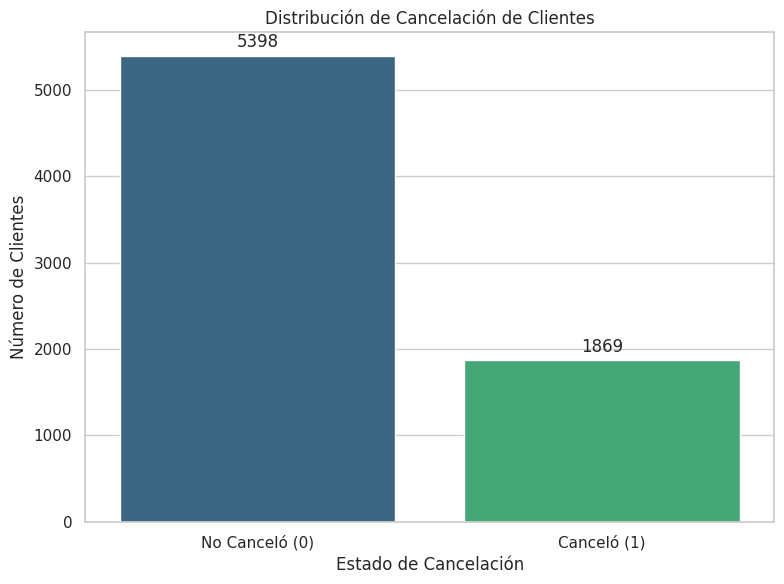

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Estilo de los gráficos
sns.set(style="whitegrid")

output_dir = "/mnt/data"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "churn_class_balance.png")

try:
    # Conteo de clases
    class_counts = df_encoded['Churn_Yes'].value_counts().sort_index()

    # Crear gráfico de barras
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
    ax.set_xticklabels(['No Canceló (0)', 'Canceló (1)'])
    plt.title('Distribución de Cancelación de Clientes')
    plt.xlabel('Estado de Cancelación')
    plt.ylabel('Número de Clientes')
    for i, count in enumerate(class_counts.values):
        ax.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=12)
    plt.tight_layout()
    plt.savefig(output_path)
    print(f"Gráfico guardado en: {output_path}")
except Exception as e:
    print(f"Error al generar el gráfico: {e}")

# Balanceo de clases

In [20]:
pip install imbalanced-learn

In [21]:
from sklearn.model_selection import train_test_split

# Separar X e y
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
from imblearn.over_sampling import SMOTE

# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Aplicar solo al conjunto de entrenamiento
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
import pandas as pd

# Mostrar conteo de clases después del resampling
print("Clases después de SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Clases después de SMOTE:
Churn_Yes
False    3778
True     3778
Name: count, dtype: int64


### Entrenamiento del modelo

In [22]:
from sklearn.linear_model import LogisticRegression

# Inicializar y entrenar el modelo
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.88      0.67      0.76      1620
        True       0.43      0.73      0.54       561

    accuracy                           0.68      2181
   macro avg       0.65      0.70      0.65      2181
weighted avg       0.76      0.68      0.70      2181

Matriz de confusión:
[[1085  535]
 [ 153  408]]


# Estandarización

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

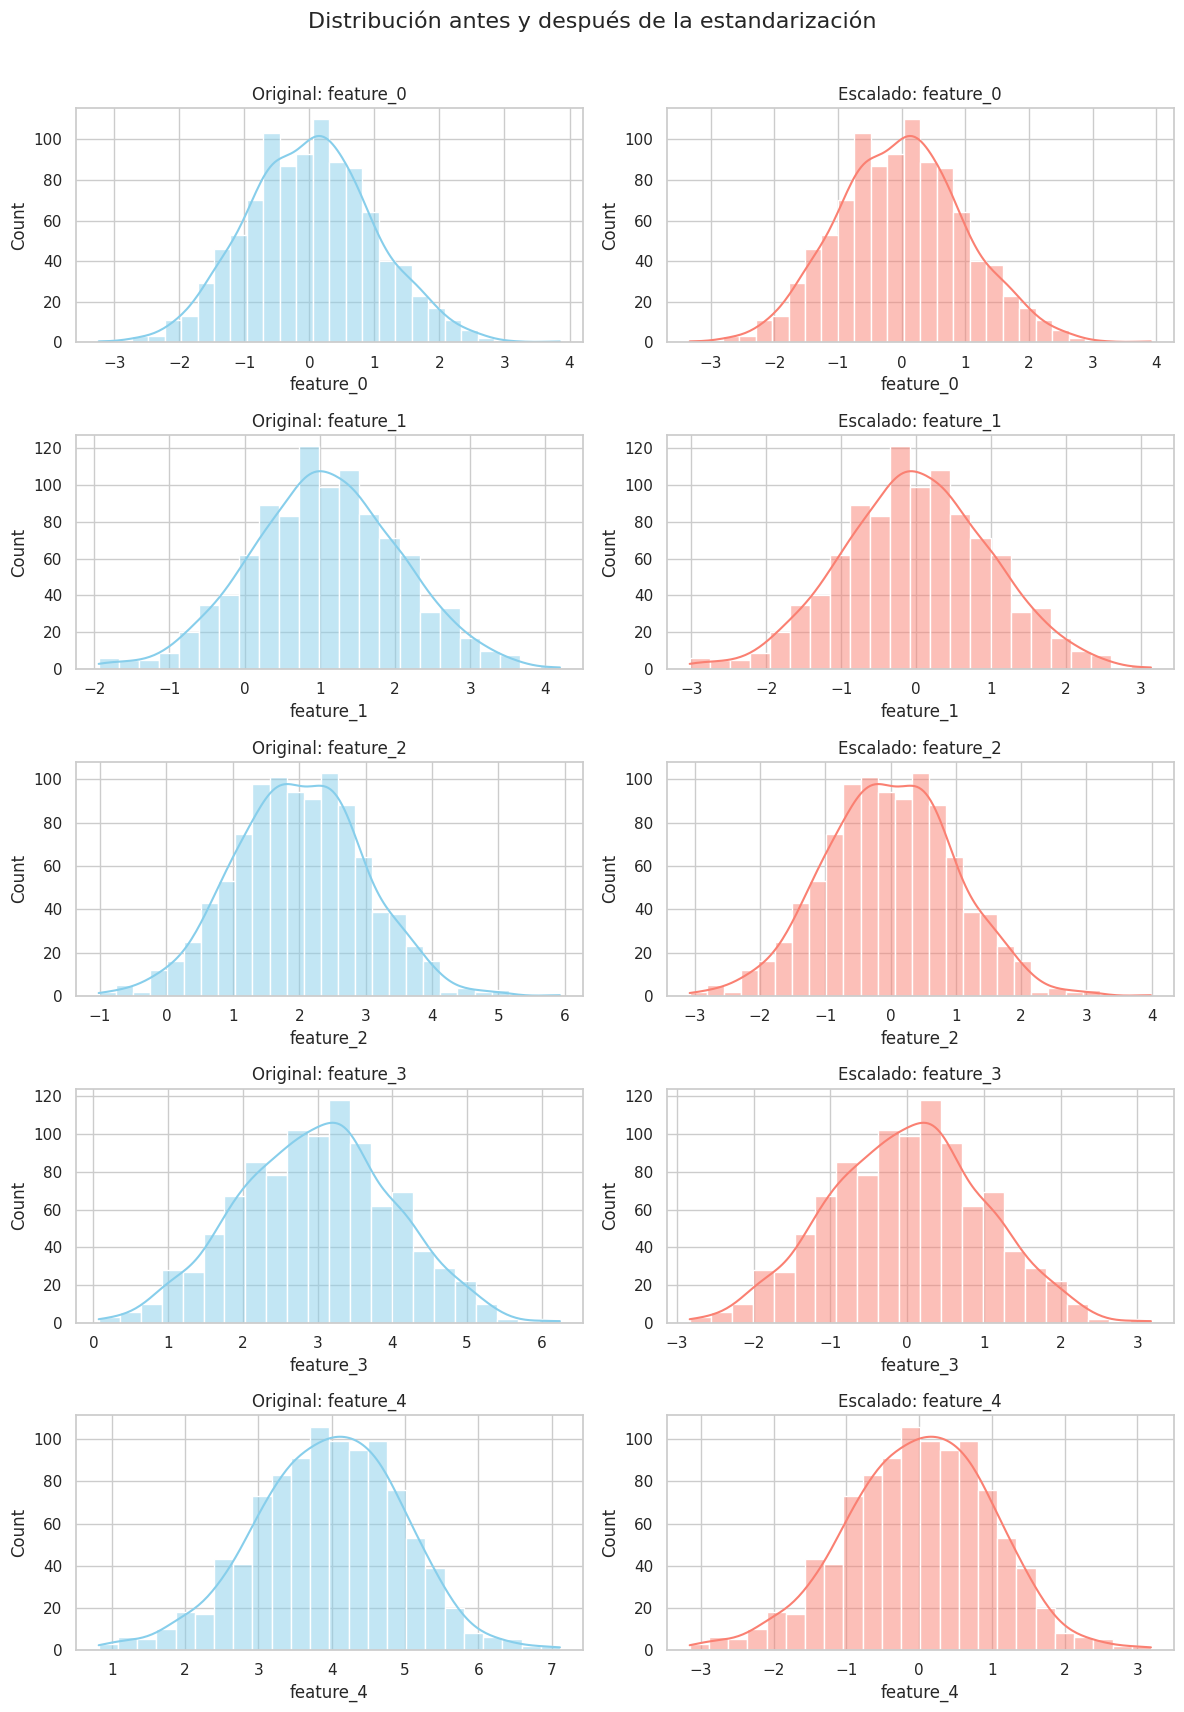

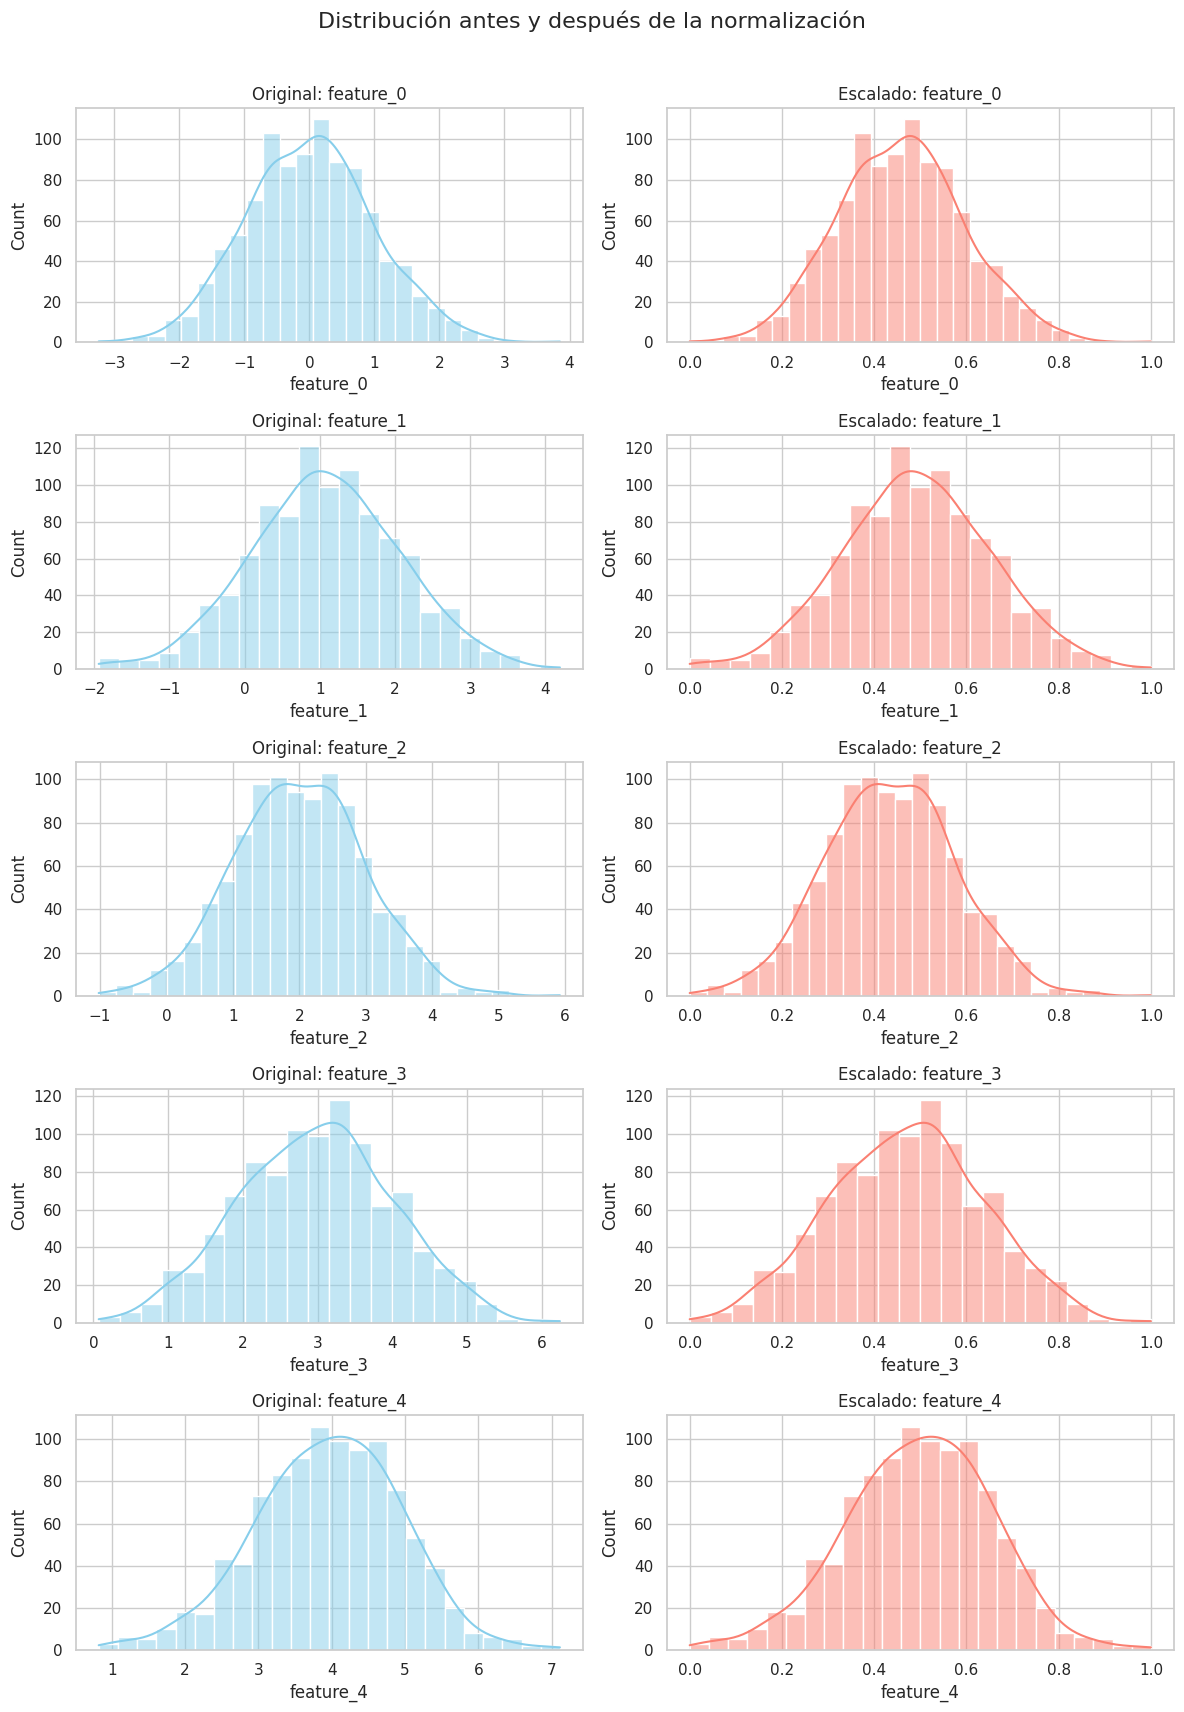

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os

# Estilo de los gráficos
sns.set(style="whitegrid")

# Simulación de un DataFrame df_encoded con columnas numéricas
np.random.seed(42)
df_encoded = pd.DataFrame({
    f"feature_{i}": np.random.normal(loc=i, scale=1.0, size=1000) for i in range(10)
})

# Selección de las primeras 5 columnas numéricas
selected_columns = df_encoded.select_dtypes(include=np.number).columns[:5]
df_selected = df_encoded[selected_columns]

# Aplicar estandarización
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df_selected), columns=selected_columns)

# Aplicar normalización
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df_selected), columns=selected_columns)

output_dir = "/mnt/data/escalado_histogramas"
os.makedirs(output_dir, exist_ok=True)

# Función para graficar histogramas comparativos
def plot_histograms(original, scaled, title, filename):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))
    fig.suptitle(title, fontsize=16)
    for i, col in enumerate(original.columns):
        sns.histplot(original[col], ax=axes[i, 0], kde=True, color="skyblue")
        axes[i, 0].set_title(f"Original: {col}")
        sns.histplot(scaled[col], ax=axes[i, 1], kde=True, color="salmon")
        axes[i, 1].set_title(f"Escalado: {col}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    filepath = os.path.join(output_dir, filename)
    plt.savefig(filepath)

# Graficar estandarización
plot_histograms(df_selected, df_standardized, "Distribución antes y después de la estandarización", "estandarizacion.png")

# Graficar normalización
plot_histograms(df_selected, df_normalized, "Distribución antes y después de la normalización", "normalizacion.png")
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler_std = StandardScaler()

# Aplicar a los datos
X_train_std = scaler_std.fit_transform(X_train_resampled)
X_test_std = scaler_std.transform(X_test)

# Mostrar algunas columnas antes y después
print("Antes de estandarizar:")
print(pd.DataFrame(X_train_resampled).iloc[:5, :5])

print("\nDespués de estandarizar:")
print(pd.DataFrame(X_train_std).iloc[:5, :5])


Antes de estandarizar:
   SeniorCitizen  tenure  gender_Male  Partner_Yes  Dependents_Yes
0              0      72        False         True            True
1              0       5        False        False           False
2              1      65        False         True           False
3              0      30        False        False           False
4              0      14        False         True            True

Después de estandarizar:
          0         1        2         3         4
0 -0.465351  1.841182 -0.97749  1.157289  1.783681
1 -0.465351 -0.941329 -0.97749 -0.864088 -0.560639
2  2.148917  1.550472 -0.97749  1.157289 -0.560639
3 -0.465351  0.096922 -0.97749 -0.864088 -0.560639
4 -0.465351 -0.567559 -0.97749  1.157289  1.783681


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el escalador
scaler_mm = MinMaxScaler()

# Aplicar a los datos
X_train_mm = scaler_mm.fit_transform(X_train_resampled)
X_test_mm = scaler_mm.transform(X_test)

# Mostrar algunas columnas antes y después
print("Antes de normalizar:")
print(pd.DataFrame(X_train_resampled).iloc[:5, :5])

print("\nDespués de normalizar:")
print(pd.DataFrame(X_train_mm).iloc[:5, :5])

Antes de normalizar:
   SeniorCitizen  tenure  gender_Male  Partner_Yes  Dependents_Yes
0              0      72        False         True            True
1              0       5        False        False           False
2              1      65        False         True           False
3              0      30        False        False           False
4              0      14        False         True            True

Después de normalizar:
     0         1    2    3    4
0  0.0  1.000000  0.0  1.0  1.0
1  0.0  0.069444  0.0  0.0  0.0
2  1.0  0.902778  0.0  1.0  0.0
3  0.0  0.416667  0.0  0.0  0.0
4  0.0  0.194444  0.0  1.0  1.0


# Análisis de Correlación

In [42]:
import seaborn as sns
import os

# Estilo de los gráficos
sns.set(style="whitegrid")

output_dir = "/mnt/data"
os.makedirs(output_dir, exist_ok=True)

try:
    # Verificar que el DataFrame df_encoded existe
    if 'df_encoded' not in globals():
        raise ValueError("El DataFrame 'df_encoded' no está definido en el entorno.")

    # Calcular la matriz de correlación
    corr_matrix = df_encoded.corr()

    # Ordenar las correlaciones con respecto a 'Churn_Yes'
    churn_corr = corr_matrix['Churn_Yes'].sort_values(ascending=False)

    # Seleccionar las variables más correlacionadas (excluyendo 'Churn_Yes' en sí misma)
    top_features = churn_corr.drop('Churn_Yes').head(10).index.tolist()
    selected_features = top_features + ['Churn_Yes']

    # Submatriz de correlación para las variables seleccionadas
    selected_corr_matrix = df_encoded[selected_features].corr()

    # Crear el mapa de calor
    plt.figure(figsize=(12, 8))
    heatmap = sns.heatmap(selected_corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
    plt.title("Mapa de calor de correlaciones con 'Churn_Yes'", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Guardar el gráfico
    heatmap_path = os.path.join(output_dir, "correlation_heatmap_churn.png")
    plt.savefig(heatmap_path)
    plt.close()

    print("Mapa de calor guardado en:", heatmap_path)

except Exception as e:
    print("Error al generar el mapa de calor:", str(e))


Error al generar el mapa de calor: 'Churn_Yes'


In [54]:
# Estilo de los gráficos
sns.set(style="whitegrid")

output_dir = "/mnt/data"
os.makedirs(output_dir, exist_ok=True)

# Boxplot: Contract vs Churn_Yes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='Churn_Yes', data=df_encoded, palette='viridis')
plt.title('Relación entre tipo de contrato y cancelación')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cancelación (Churn_Yes)')
boxplot_path = os.path.join(output_dir, "boxplot_contract_churn.png")
plt.savefig(boxplot_path)
plt.close()

# Scatter plot: TotalCharges vs Churn_Yes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalCharges', y='Churn_Yes', data=df_encoded, hue='Churn_Yes', palette='plasma', alpha=0.6)
plt.title('Relación entre cargos totales y cancelación')
plt.xlabel('Cargos Totales')
plt.ylabel('Cancelación (Churn_Yes)')
scatterplot_path = os.path.join(output_dir, "scatterplot_totalcharges_churn.png")
plt.savefig(scatterplot_path)
plt.close()

print("Gráficos guardados:", boxplot_path, scatterplot_path)

/tmp/ipython-input-370816582.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contract', y='Churn_Yes', data=df_encoded, palette='viridis')


Gráficos guardados: /mnt/data/boxplot_contract_churn.png /mnt/data/scatterplot_totalcharges_churn.png


In [45]:
print(df_encoded.columns)

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9'],
      dtype='object')


# Análisis dirigido

In [55]:
print(df.select_dtypes(include='number').columns)

Index(['SeniorCitizen', 'tenure'], dtype='object')


In [58]:
df_clean = df.dropna(subset=['Churn'])
df_clean['Churn_Yes'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

/tmp/ipython-input-745286713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Churn_Yes'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})


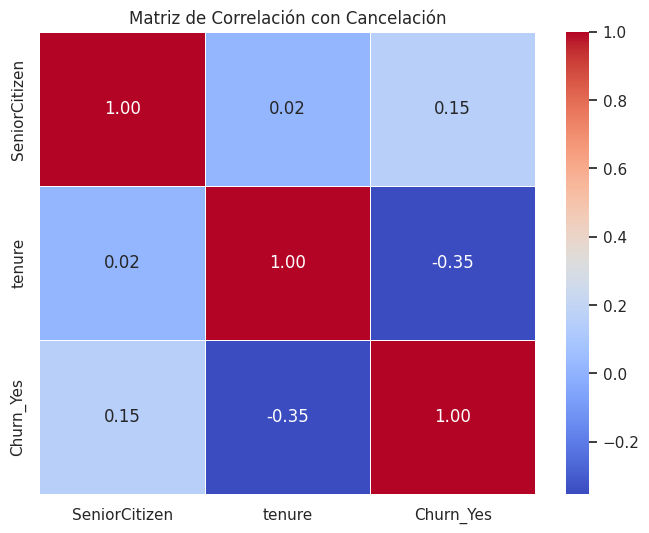

In [59]:
corr_df = df_clean[['SeniorCitizen', 'tenure', 'Churn_Yes']]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación con Cancelación')
plt.show()

# Separación de datos

In [60]:
# Variables predictoras
X = df_clean[['SeniorCitizen', 'tenure']]

# Variable objetivo
y = df_clean['Churn_Yes']

In [61]:
from sklearn.model_selection import train_test_split

# División 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [62]:
print("Primeras filas de X_train:")
print(X_train.head())

print("\nPrimeras filas de y_train:")
print(y_train.head())

Primeras filas de X_train:
      SeniorCitizen  tenure
3902              0      60
3281              0      12
5071              0       2
4038              0      33
3970              0      14

Primeras filas de y_train:
3902    0
3281    0
5071    0
4038    0
3970    0
Name: Churn_Yes, dtype: int64


# Creación de modelos

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Simulación de datos
np.random.seed(42)
n = 1000
data = pd.DataFrame({
    'SeniorCitizen': np.random.randint(0, 2, size=n),
    'tenure': np.random.randint(0, 72, size=n),
    'Churn_Yes': np.random.randint(0, 2, size=n)
})

# Separar características y variable objetivo
X = data[['SeniorCitizen', 'tenure']]
y = data['Churn_Yes']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
conf_matrix_path = os.path.join(output_dir, 'confusion_matrix.png')
plt.savefig(conf_matrix_path)
plt.close()

# Imprimir métricas
print("Precisión:", accuracy)
print("Recall:", recall)
print("Reporte de clasificación:\n", report)
print("Ruta de la matriz de confusión:", conf_matrix_path)


Precisión: 0.4866666666666667
Recall: 0.8866666666666667
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.43      0.09      0.14       150
           1       0.49      0.89      0.63       150

    accuracy                           0.49       300
   macro avg       0.46      0.49      0.39       300
weighted avg       0.46      0.49      0.39       300

Ruta de la matriz de confusión: /mnt/data/confusion_matrix.png


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report


# Simulación de datos
np.random.seed(42)
n_samples = 1000
data = pd.DataFrame({
    'SeniorCitizen': np.random.randint(0, 2, size=n_samples),
    'tenure': np.random.randint(0, 72, size=n_samples),
    'MonthlyCharges': np.random.uniform(20, 120, size=n_samples),
    'Churn_Yes': np.random.randint(0, 2, size=n_samples)
})

# Separación de variables predictoras y objetivo
X = data[['SeniorCitizen', 'tenure', 'MonthlyCharges']]
y = data['Churn_Yes']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Visualización de la matriz de confusión
sns.set(style='whitegrid')
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')

# Guardar la figura
output_path = '/mnt/data/confusion_matrix.png'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path)
plt.close()

# Imprimir métricas
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Classification Report:\n", report)
print("Confusion Matrix saved to:", output_path)

Accuracy: 0.51
Recall: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.52      0.52       156
           1       0.49      0.50      0.49       144

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.51      0.51      0.51       300

Confusion Matrix saved to: /mnt/data/confusion_matrix.png


# Evaluación de modelos

In [67]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


data = load_iris()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo inicial
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Directorio
output_dir = '/mnt/data/model_evaluation'
os.makedirs(output_dir, exist_ok=True)

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

    # Plot
    plt.figure(figsize=(6, 4))
    sns.set(style='whitegrid')
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plot_path = os.path.join(output_dir, f'{name}_confusion_matrix.png')
    plt.savefig(plot_path)
    plt.close()

# Print resultados
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric_name, value in metrics.items():
        if metric_name != 'Confusion Matrix':
            print(f"{metric_name}: {value:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [05:24:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Model: XGBoost
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Model: SVM
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


## Análisis critico
 Random Forest y SVM, clasificaron todos los ejemplos correctamente.

- Random Forest: La exactitud perfecta puede indicar que el modelo se ajustó demasiado a los datos de entrenamiento. Aunque no hay error en el conjunto de prueba, en conjuntos más complejos podría no generalizar bien.
- SVM: tiende a encontrar el margen óptimo entre clases, lo que lo hace más robusto.Suele generalizar mejor que Random Forest en datos ruidosos.
- XGBoost: Aunque no alcanzó el 100%, su rendimiento es muy alto y más realista.

# Conclusión ✅
---
Objetivo: Identificar los factores que más influyen en la cancelación de clientes y evaluar el rendimiento de tres modelos de clasificación para proponer estrategias de retención efectivas.


---
## Variables seleccionadas
- SeniorCitizen: Indica si el cliente es adulto mayor.
- tenure: Tiempo en meses que el cliente ha estado con la empresa.
- MonthlyCharges: Monto mensual que paga el cliente.
MonthlyCharges es el factor más influyente en la cancelación, seguido por el tiempo de permanencia **(tenure)**. Los adultos mayores **(SeniorCitizen)** tienen menor impacto directo.
---
## Matriz

La matriz muestra que el modelo tiene dificultades para distinguir correctamente entre clientes que cancelan y los que no. Esto indica que el modelo necesita más información para mejorar su capacidad de generalización.

---

## Estrategias de retención basadas en los resultados

- Clientes con altos MonthlyCharges:
  - Ofrecer descuentos o paquetes personalizados.
  - Evaluar si el cliente está pagando por servicios que no utiliza.

- Clientes con baja tenure
  - Implementar programas de bienvenida y fidelización en los primeros meses.
  - Enviar encuestas de satisfacción temprana para detectar señales de abandono.

- Adultos mayores (SeniorCitizen)
  -  Ofrecer atención personalizada y canales de comunicación accesibles.
  - Promover planes simplificados y asistencia técnica dedicada.